# Hypothesis Testing

## The research proposal

## Question: 

### Are the mean car prices based on fuel type affected by time? Is there a significant price different between gasoline and diesel cars?

## Background on fuels

####  Diesel engine, like the gasoline engines, are internal combustion engines. It mixes fuel and air inside the engine cylinders, <br> and at a critical point, the mixture is ignited. The combustion drives the piston down and turns the crankshaft and ultimately<br>turns the wheels. Where the diesel and gas engines diverge is how the fuel is ignited inside the engine. <br>In a gas engine, the fuel and air mixture are compressed and ignited. But in a diesel engine, there are no spark plugs. <br>When diesel fuel and air are squeezed enough, the extreme compression generates enough heat to spontaneously combust. <br>Diesel fuel often costs more than gasoline, but it requires less fuel to accomplish the same amount work as gasoline. Therefore, diesel powertrain delivers more mileage than gasoline. However, the status quo is, in the long run, the vehicles using both fuels will cost the same. In this research, we use Hypothesis testing to determine if the price of diesel and gasoline cars remain equally the same over time. I believe the diesel type cars will cost more over time with 95% confident.

## Success Metrics

## Null Hypothesis (Ho): The difference of the mean Present Price  for petrol and diesel cars  remain the same.
### Ho: µ1 = µ2 
### µ1 = present mean price for petrol cars
### µ2 = present mean price for diesel cars

## Alternate Hypothesis (Ha): The mean Present Price for diesel cars are higher than mean Present Price for petrol cars.
### Ha: µ1 < µ2
### This should be a left tail test

### Level of Confidence (C): 95%

## Data Source

### Data: The data used for this research was acquired from : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/download

In [59]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import scipy.stats as stats

In [60]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Cleanup

In [61]:
#drop columns that is not relevent
df = df.drop(['Kms_Driven','Seller_Type','Transmission','Owner', 'Car_Name'], axis=1)

In [62]:
#sort dataframe by year
df.sort_values('Year').head()

,Year,Selling_Price,Present_Price,Fuel_Type
37,2003,0.35,2.28,Petrol
39,2003,2.25,7.98,Petrol
77,2004,1.50,12.35,Petrol
54,2005,2.75,10.21,Petrol
84,2005,3.49,13.46,Diesel


In [63]:
#sort dataframe by year
df.sort_values('Year').tail()

,Year,Selling_Price,Present_Price,Fuel_Type
104,2017,1.35,1.47,Petrol
265,2017,6.50,8.70,Petrol
66,2017,19.75,23.15,Petrol
134,2017,0.65,0.81,Petrol
5,2018,9.25,9.83,Diesel


In [64]:
df.isnull().sum().sum()

0

In [65]:
# How large is each group?
df.groupby(['Fuel_Type', 'Year','Selling_Price','Present_Price']).size()

Fuel_Type  Year  Selling_Price  Present_Price
CNG        2011  2.95           7.74             1
           2015  3.25           5.09             1
Diesel     2005  3.49           13.46            1
           2010  3.25           6.79             1
                 9.25           20.45            1
                                                ..
Petrol     2017  7.90           8.10             1
                 9.10           9.40             1
                 9.25           9.40             1
                 17.00          18.64            1
                 19.75          23.15            1
Length: 295, dtype: int64

In [66]:
df = df[df.Fuel_Type != 'CNG']

In [67]:
# finding mean for each group, Fuel type:
df.groupby('Fuel_Type').mean()

,Year,Selling_Price,Present_Price
Fuel_Type,,,
Diesel,2014.000000,10.278500,15.814500
Petrol,2013.539749,3.264184,5.583556


## Filter out Fuel Types for present price

In [68]:
df_petrol = df[df['Fuel_Type'] == 'Petrol']['Present_Price']

In [69]:
df_diesel = df[df['Fuel_Type'] == 'Diesel']['Present_Price']

## Pass these values to the t-test

In [70]:
stats.ttest_ind(df_petrol, df_diesel, equal_var=False)

Ttest_indResult(statistic=-5.766724189665223, pvalue=2.567770993563653e-07)

## Experiment Wrap Up
### The  α  value is: 5%/2 or 0.25. The pvalue calculated here is much smaller than the the  α and falls into the rejection region.
### Therefore, the Null Hypothesis is rejected. The mean Present value of diesel cars are higher than the mean value of the petrol cars. 

## More studies can be performed with this data frame. 

### There used to be a negative perception that diesel cars were slower, smellier, noisier and more expensive than petrol cars. This perception has slowed the sale of diesel cars. However, with advancing technology, Diesel has closed the gap significantly in these categories.


## Business Value


### New car value will start to depreciate the moment it hits the road. The outcome of this experiment can be used to increase customer confidence with the fact that diesel cars retain their value better than petrol cars.

### We can experiment if the depreciation value can be used as Ho & Ha and perform the same experiment as above.

## Formula for total depreciation
### (Selling Price - Present Price)/number of Years


In [71]:
df['Depreciation'] = (df['Present_Price']-df['Selling_Price'])/(2018 - df['Year'])

In [72]:
df.head(6)

,Year,Selling_Price,Present_Price,Fuel_Type,Depreciation
0,2014,3.35,5.59,Petrol,0.560000
1,2013,4.75,9.54,Diesel,0.958000
2,2017,7.25,9.85,Petrol,2.600000
3,2011,2.85,4.15,Petrol,0.185714
4,2014,4.60,6.87,Diesel,0.567500
5,2018,9.25,9.83,Diesel,inf


In [73]:
df = df[df.Year != 2018]

In [74]:
df_petrol_depreciation = df[df['Fuel_Type'] == 'Petrol']['Depreciation']

In [75]:
df_diesel_depreciation = df[df['Fuel_Type'] == 'Diesel']['Depreciation']

In [76]:
stats.ttest_ind(df_petrol_depreciation, df_diesel_depreciation, equal_var=False)

Ttest_indResult(statistic=-4.633617828393876, pvalue=1.7701031603469752e-05)

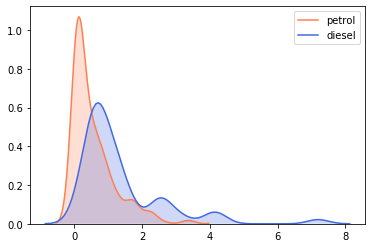

T-test 1: Ttest_indResult(statistic=-6.805890606067963, pvalue=5.579111219007758e-11)


In [80]:
fig1 = plt.figure()
p1=sns.kdeplot(df_petrol_depreciation, shade=True, color="coral", label='petrol')
p2=sns.kdeplot(df_diesel_depreciation, shade=True, color="royalblue", label='diesel')
plt.legend()
plt.show()
print('T-test 1:',stats.ttest_ind(a = df_petrol_depreciation, b = df_diesel_depreciation))
#fig1.savefig('../reports/img/Q1WeekendVsWeekday.png', bbox_inches='tight'

In [81]:
df_petrol_depreciation.mean()

0.5526967050383368

In [82]:
df_diesel_depreciation.mean()

1.3398348544111254

In [84]:
df_diesel_depreciation.std()

1.2668154192418377

## Conclusion

#### Modern diesel engine cars produce less CO2 than petrol engine cars. Diesel engines also provides better fuel efficiency than petrol engines.
#### Based on this experiment, diesel-fueled car's depreciation value decline slower than the petrol-fueled cars. Car dealerships can use this fact to promote the sales of diesel vehicles.